In [2]:
%load_ext autoreload
%autoreload 2

In [109]:
from torch import nn
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import einops

import utils

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
mpl.rc('font', **font)

In [115]:
np.random.seed(1444)  # keep results consistent

n = 4
Toeplitz = lambda n: 3 * np.eye(n) - np.tri(n, k=1) + np.tri(n, k=-2)
T = Toeplitz(n) 
A1 = np.random.randn(n, n) * 10
A2 = np.random.randn(n, n)
print(T)
print(A1)
print(A2)

print(np.linalg.cond(T))
print(np.linalg.cond(A1))
print(np.linalg.cond(A2))

evals, evecs = utils.eigsort(T)
pvals, pvecs = utils.eigsort(A1)
qvals, qvecs = utils.eigsort(A2)

print(evals)
print(pvals)
print(qvals)



[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]
[[  7.99765329  -5.93028619  28.50892112  -3.5337648 ]
 [ -0.77764532   5.89136455  -7.08110784   1.07790755]
 [  1.31238966  -4.57136358 -14.06219563   1.04416997]
 [  1.46366453  -0.28914403  16.71618744  -4.61121356]]
[[-0.50459803 -1.14738513  0.72664351  1.00923002]
 [-0.08832612  1.03187139  0.34859568  1.22091024]
 [-0.31984896 -0.54862476 -1.23112277 -0.81320297]
 [-2.33817286  0.69947484  0.3209288  -0.72500417]]
9.472135954999587
16.433982868668213
3.4692188405646647
[0.38196601 1.38196601 2.61803399 3.61803399]
[-18.14754052  -2.75421837   4.62281504  11.4945525 ]
[-1.09608076-1.85460556j -1.09608076+1.85460556j -0.91595392+0.j
  1.67926185+0.j        ]


In [122]:
"""
Experiemnt 2, pretrain model on Teoplitz, then train further on random matrices.
"""

model = utils.EigenSolver(n, [10, 20, 25], nonlin=nn.ReLU, use_bias=False, seed=1444)

model.train(T, t=[1e2], epochs=1000, lr=0.0035)
utils.plot_history(model, evals, evecs, "train_mat1");
print(f"Accurate decimals: {-np.log10(np.min(np.abs(evals - model.vals[-1]))):.0f}")
utils.plot_vecs(model, "eigenvecs");

model.train(A1, [1e2], epochs=1000, lr=0.0001)
utils.plot_history(model, pvals, pvecs, "train_mat2");
print(f"Accurate decimals: {-np.log10(np.min(np.abs(pvals - model.vals[-1]))):.0f}")

model.train(A2, [1e2], 1000, lr=0.0001)
utils.plot_history(model, qvals, qvecs, "train_mat3")
print(f"Accurate decimals: {-np.log10(np.min(np.abs(qvals - model.vals[-1]))):.0f}")
utils.plot_vecs(model, "more_eigenvecs");

  0%|          | 0/1000 [00:00<?, ?it/s]

Network converged!
Accurate decimals: 6


  0%|          | 0/1000 [00:00<?, ?it/s]

Network converged!
Accurate decimals: 4


  0%|          | 0/1000 [00:00<?, ?it/s]

Network converged!


/home/hakon/.pyenv/versions/3.9.2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Accurate decimals: 3


<Figure size 864x864 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x576 with 0 Axes>

  0%|          | 0/1000 [00:00<?, ?it/s]

Network converged!
Accurate decimals: 4 after 101 epochs


  0%|          | 0/1000 [00:00<?, ?it/s]

Network converged!
Accurate decimals: 5 after 569 epochs


  0%|          | 0/1000 [00:00<?, ?it/s]

Network converged!
Accurate decimals: 6 after 156 epochs


  0%|          | 0/1000 [00:00<?, ?it/s]

Network converged!
Accurate decimals: 4 after 142 epochs


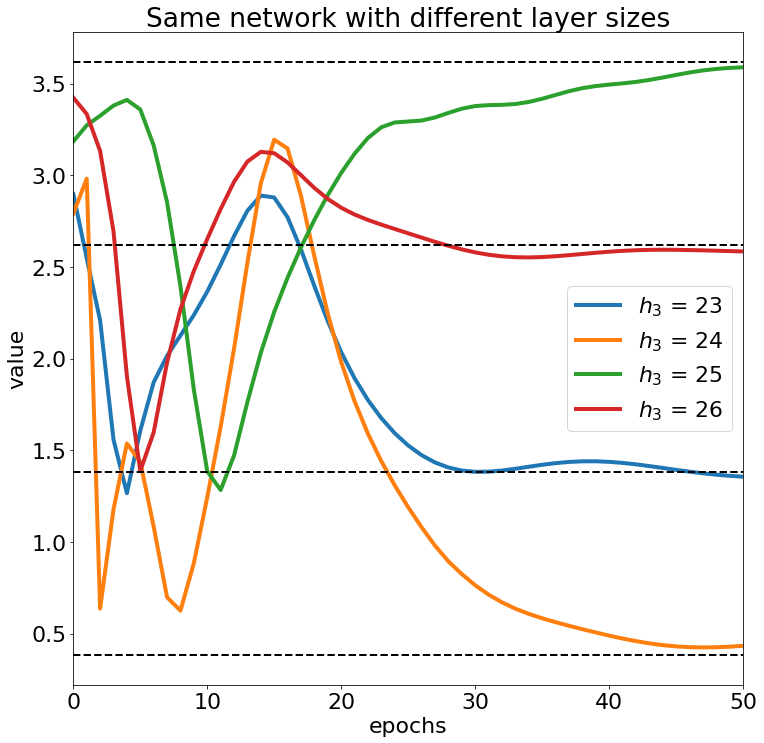

In [117]:
"""
Experiment 1, change larser size of last layer
"""
fig, ax = plt.subplots(figsize=(12, 12))
l = 0
for h3 in [23, 24, 25, 26]:
    model = utils.EigenSolver(n, [10, 20, h3], nonlin=nn.ReLU, use_bias=False, seed=1444)
    model.train(T, t=[1e2], epochs=1000, lr=0.0035)

    ax.plot(model.vals, lw=4, label=rf"$h_3$ = {h3}")
    print(f"Accurate decimals: {-np.log10(np.min(np.abs(evals - model.vals[-1]))):.0f} after {len(model.vals)} epochs")
    l = max(l, len(model.vals))
ax.plot(einops.repeat(evals, "v -> r v", r=l), "k--", lw=2)
ax.set_xlim([0, 50])
ax.set_xlabel("epochs")
ax.set_ylabel("value")
ax.set_title("Same network with different layer sizes")
ax.legend()
plt.savefig("figs/layer_size.pdf")
